'Id'
'EmployeeName'
'JobTitle'
'BasePay'
'OvertimePay'
'OtherPay'
'Benefits'
'TotalPay' -> salary
'TotalPayBenefits'
'Year'
'Notes'
'Agency'
'Status'
Tasks
Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

Data Cleaning: Handle missing data by suitable method with explain why you use it.

Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column ;'TotalPay' -> salary


In [9]:
rows, columns = df.shape
df.shape

(148654, 13)

In [8]:
print("# of rows",rows)
print("# of columns",columns)

# of rows 148654
# of columns 13


In [19]:
datatype_per_columns=df.dtypes
datatype_per_columns

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [65]:
missing_values= df.isnull() 
missing_values

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,False,False,False,False,False,False,True,False,False,False,True,False,True
1,False,False,False,False,False,False,True,False,False,False,True,False,True
2,False,False,False,False,False,False,True,False,False,False,True,False,True
3,False,False,False,False,False,False,True,False,False,False,True,False,True
4,False,False,False,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,False,False,False,False,False,False,False,False,False,False,True,False,True
148650,False,False,False,True,True,True,True,False,False,False,True,False,True
148651,False,False,False,True,True,True,True,False,False,False,True,False,True
148652,False,False,False,True,True,True,True,False,False,False,True,False,True


In [192]:
missing_values.sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.


In [193]:
salary_ds=df['TotalPay'].describe()
salary_ds

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [194]:
range_of_salaries=salary_ds['max']-salary_ds['min']
range_of_salaries

568213.56

In [195]:
mode_salary=df['TotalPay'].mode()
mode_salary

0    0.0
Name: TotalPay, dtype: float64

In [196]:
median_salary=df['TotalPay'].median()
median_salary

71426.60999999999

# Data Cleaning: Handle missing data by suitable method with explain why you use it.

In [197]:
statistics_df = pd.DataFrame({
    'Salary': ["mean_salary", "median_salary", "mode_salary", "std_dev_salary"],
    'Descriptive Summary': [salary_ds['mean'], median_salary, mode_salary,salary_ds['std']]
})
statistics_df

,Salary,Descriptive Summary
0,mean_salary,74768.321972
1,median_salary,71426.61
2,mode_salary,"0 0.0 Name: TotalPay, dtype: float64"
3,std_dev_salary,50517.005274


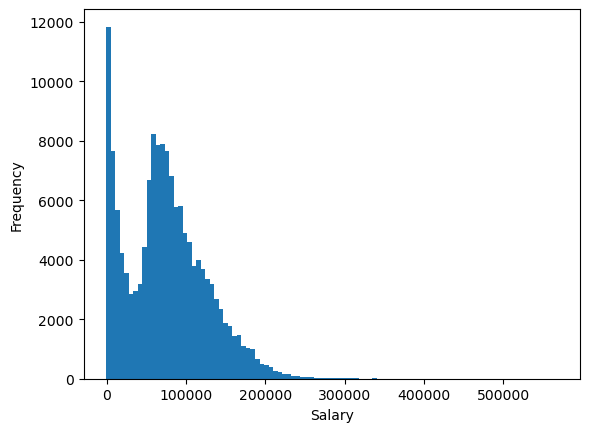

In [198]:
import matplotlib.pyplot as plt
plt.hist(df['TotalPay'], bins=100)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [138]:
# Fill missing values with the median salary
fill_missing_value=df['TotalPay'].fillna(median_salary)

why you use it?? 
Given the last table of Salary and Descriptive Summary , missing values are filled with median salaryas as  data has outliers and not normally distributed. 
mean is affected by the outliers

# Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.


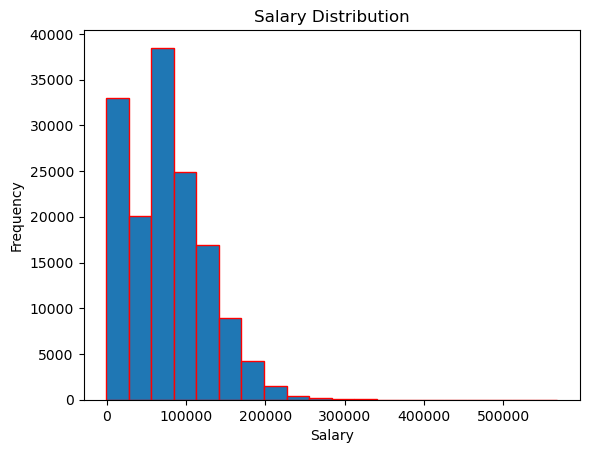

In [199]:
plt.hist(df['TotalPay'], bins=20, edgecolor='r')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

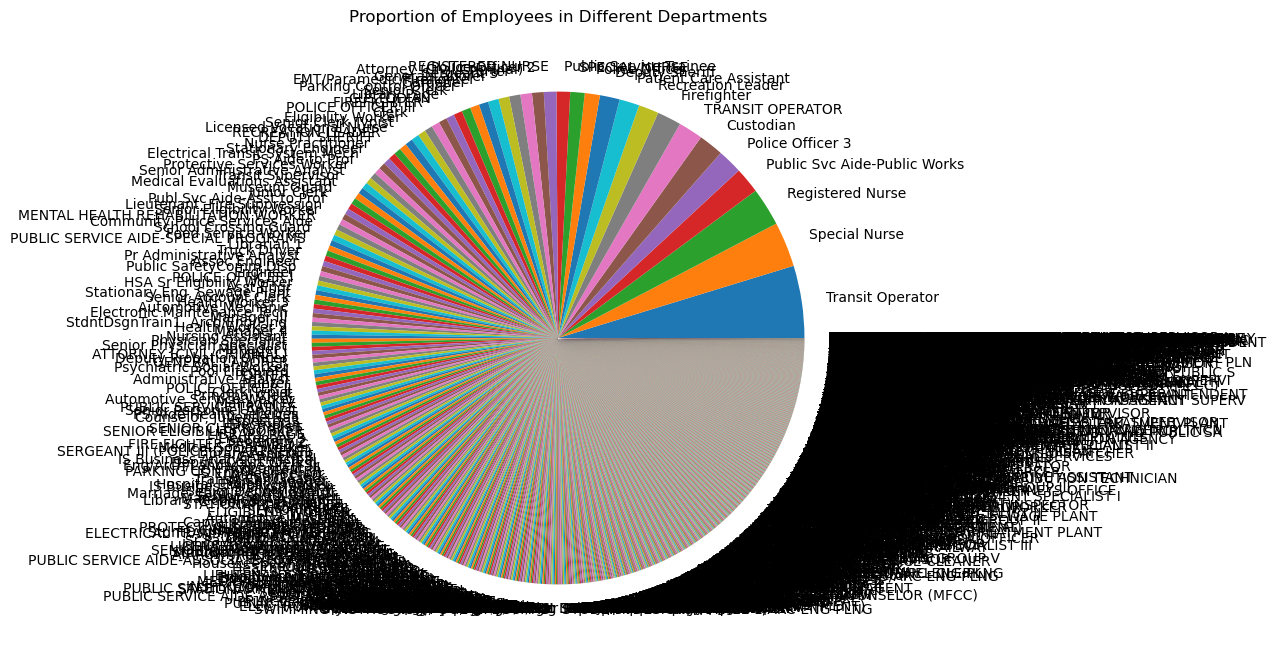

In [200]:
department_counts = df['JobTitle'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index)
plt.title('Proportion of Employees in Different Departments')
plt.show()

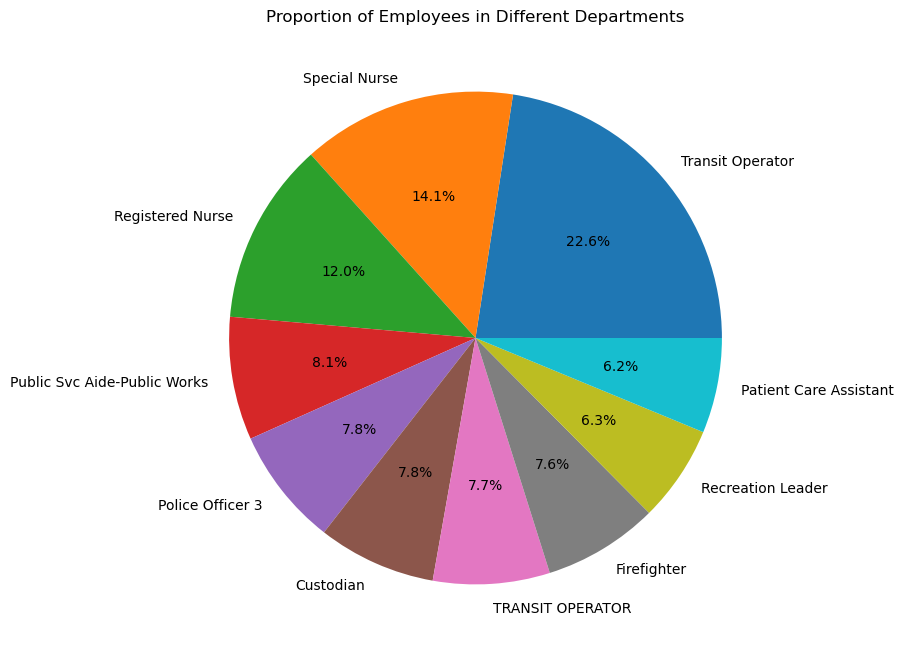

In [201]:
head_department=df['JobTitle']
department_counts = head_department.value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index,autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()

In [202]:
department_counts

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

# Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.


In [203]:
grouped_data_year = df.groupby("Year")['TotalPay'].agg(['mean', 'median', 'min', 'max'])
print("Grouped TotalPay by year:")
print(grouped_data_year)

Grouped TotalPay by year:
              mean     median     min        max
Year                                            
2011  71744.103871  68213.240    0.00  567595.43
2012  74113.262265  70714.680    0.00  362844.66
2013  77611.443142  74500.015    0.00  347102.32
2014  75463.918140  72359.980 -618.13  471952.64


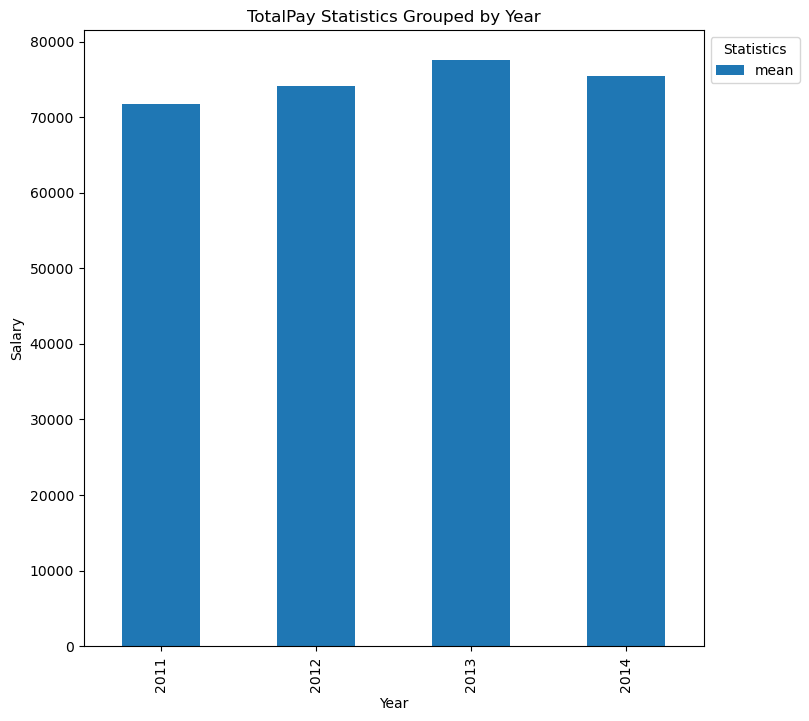

In [152]:
grouped_data_year["mean"].plot(kind='bar', figsize=(8, 8))
plt.title('TotalPay Statistics Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.legend(title='Statistics', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [158]:
grouped_data_job = df.groupby("JobTitle")['TotalPay'].agg(['mean', 'median', 'min', 'max'])
print("Grouped Analysis by job title:")
print(grouped_data_job)

Grouped Analysis by job title:
                                                        mean     median  \
JobTitle                                                                  
ACCOUNT CLERK                                   44035.664337  49777.820   
ACCOUNTANT                                      47429.268000  60076.240   
ACCOUNTANT INTERN                               29031.742917  17658.505   
ACPO,JuvP, Juv Prob (SFERS)                     62290.780000  62290.780   
ACUPUNCTURIST                                   67594.400000  67594.400   
...                                                      ...        ...   
X-RAY LABORATORY AIDE                           52705.880385  60333.125   
X-Ray Laboratory Aide                           50823.942700  60047.290   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000  53632.870   
Youth Comm Advisor                              41414.307500  44449.895   
ZOO CURATOR                                     66686.560000  66686.5

In [180]:
top_ten_jobs = grouped_data_job.sort_values(by='mean', ascending=False).head(10)
top_ten_jobs

,mean,median,min,max
JobTitle,,,,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000,399211.275,230827.12,567595.43
Chief Investment Officer,339653.700000,339653.700,339653.70,339653.70
Chief of Police,329183.646667,326716.760,321552.11,339282.07
"Chief, Fire Department",325971.683333,326233.440,314759.60,336922.01
DEPUTY DIRECTOR OF INVESTMENTS,307899.460000,307899.460,307899.46,307899.46
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000,302377.730,302377.73,302377.73
"Gen Mgr, Public Trnsp Dept",297769.413333,294000.180,294000.17,305307.89
Asst Chf of Dept (Fire Dept),281763.483889,280219.140,234795.82,333888.32
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000,261366.140,250339.35,326373.19


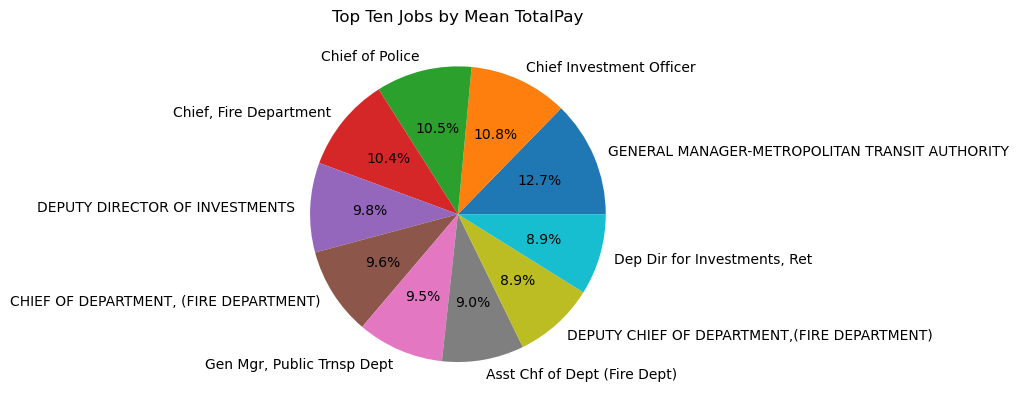

In [185]:
plt.pie(top_ten_jobs['mean'], labels=top_ten_jobs.index, autopct='%1.1f%%')
plt.title('Top Ten Jobs by Mean TotalPay')
plt.show()

In [191]:
common_jobs_departments = set(top_ten_jobs.index) & set(department_counts)
sum(common_jobs_departments)
#no common jobs between the top ten Departments and Proportion of Employees in Different Departments

0

# Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [125]:
correlation = df['TotalPay'].corr(df['OvertimePay'])
correlation

0.5048588704522462

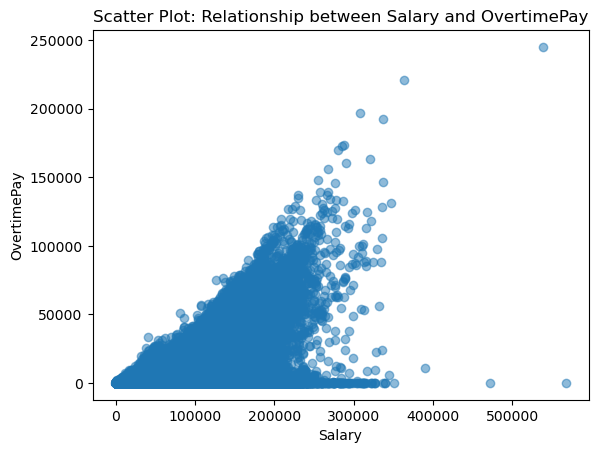

In [135]:
plt.scatter(df['TotalPay'], df['OvertimePay'], alpha=0.5)
plt.title('Scatter Plot: Relationship between Salary and OvertimePay')
plt.xlabel('Salary')
plt.ylabel('OvertimePay')
plt.show()

In [126]:
correlation = df['TotalPay'].corr(df['OtherPay'])
correlation

0.47049590107841566

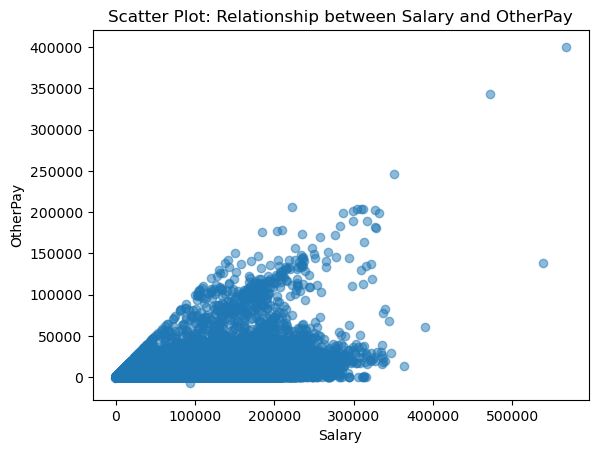

In [136]:
plt.scatter(df['TotalPay'], df['OtherPay'], alpha=0.5)
plt.title('Scatter Plot: Relationship between Salary and OtherPay')
plt.xlabel('Salary')
plt.ylabel('OtherPay')
plt.show()

In [128]:
correlation = df['TotalPay'].corr(df['BasePay'])
correlation

0.9544936474296035

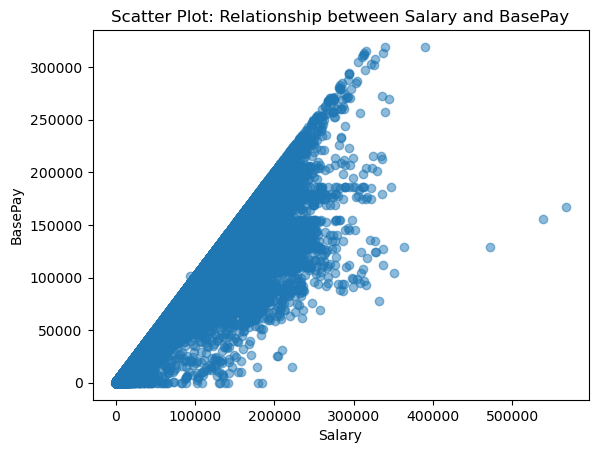

In [137]:
plt.scatter(df['TotalPay'], df['BasePay'], alpha=0.5)
plt.title('Scatter Plot: Relationship between Salary and BasePay')
plt.xlabel('Salary')
plt.ylabel('BasePay')
plt.show()

# Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.

- The mean of salary is not significantly change over the four year
- The salary is mainly depends on the base salary however the "overtime" salary, and "other pay" can affect the total salary but    not as much as the "base salary"
- Top ten no of Employees in the different departments
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
- Top ten salared Employees in the different departments (doesnt vary much by years)
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY	
Chief Investment Officer	
Chief of Police	
Chief, Fire Department
DEPUTY DIRECTOR OF INVESTMENTS
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
Gen Mgr, Public Trnsp Dept
Asst Chf of Dept (Fire Dept)
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
Dep Dir for Investments, Ret
- no common jobs between the top ten Departments and Proportion of Employees in Different Departments (the above two)